In [1]:
# Importing usefull libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Importing Energy data
EU_energy_data = pd.read_csv(f"../data/Raw/time_series_60min_singleindex.csv")

In [24]:
EU_energy_data.head()

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN


### Analysing Energy data of Austria

In [25]:
austria_df = EU_energy_data[[
    'utc_timestamp',
    'AT_load_actual_entsoe_transparency',
    'AT_load_forecast_entsoe_transparency',
    'AT_price_day_ahead',
    'AT_solar_generation_actual',
    'AT_wind_onshore_generation_actual'
]].copy()

### Preprocessing the data

In [26]:
print(austria_df.isnull().sum())

utc_timestamp                               0
AT_load_actual_entsoe_transparency          1
AT_load_forecast_entsoe_transparency        1
AT_price_day_ahead                      17556
AT_solar_generation_actual                 62
AT_wind_onshore_generation_actual          49
dtype: int64


In [27]:
# Clean the data
austria_df.rename(columns={'AT_load_actual_entsoe_transparency': 'load_actual','AT_load_forecast_entsoe_transparency':'load_forecast','AT_price_day_ahead':'price','AT_solar_generation_actual':'solar_generation','AT_wind_onshore_generation_actual':'Wind_generation'}, inplace=True)
austria_df['utc_timestamp'] = pd.to_datetime(austria_df['utc_timestamp'])

In [28]:
austria_df.head()

,utc_timestamp,load_actual,load_forecast,price,solar_generation,Wind_generation
0,2014-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 00:00:00+00:00,5946.0,6701.0,35.0,NaN,69.0
2,2015-01-01 01:00:00+00:00,5726.0,6593.0,45.0,NaN,64.0
3,2015-01-01 02:00:00+00:00,5347.0,6482.0,41.0,NaN,65.0
4,2015-01-01 03:00:00+00:00,5249.0,6454.0,38.0,NaN,64.0


In [29]:
# Helper features
austria_df['Weekday'] = austria_df['utc_timestamp'].dt.day_name()
austria_df['Hour'] = austria_df['utc_timestamp'].dt.hour
austria_df['Month'] = austria_df['utc_timestamp'].dt.month_name()

In [30]:
austria_df = austria_df.set_index('utc_timestamp')

In [31]:
austria_df.head()

,load_actual,load_forecast,price,solar_generation,Wind_generation,Weekday,Hour,Month
utc_timestamp,,,,,,,,
2014-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,Wednesday,23,December
2015-01-01 00:00:00+00:00,5946.0,6701.0,35.0,NaN,69.0,Thursday,0,January
2015-01-01 01:00:00+00:00,5726.0,6593.0,45.0,NaN,64.0,Thursday,1,January
2015-01-01 02:00:00+00:00,5347.0,6482.0,41.0,NaN,65.0,Thursday,2,January
2015-01-01 03:00:00+00:00,5249.0,6454.0,38.0,NaN,64.0,Thursday,3,January


<Axes: title={'center': 'Missing Price Values Per Month'}, xlabel='utc_timestamp'>

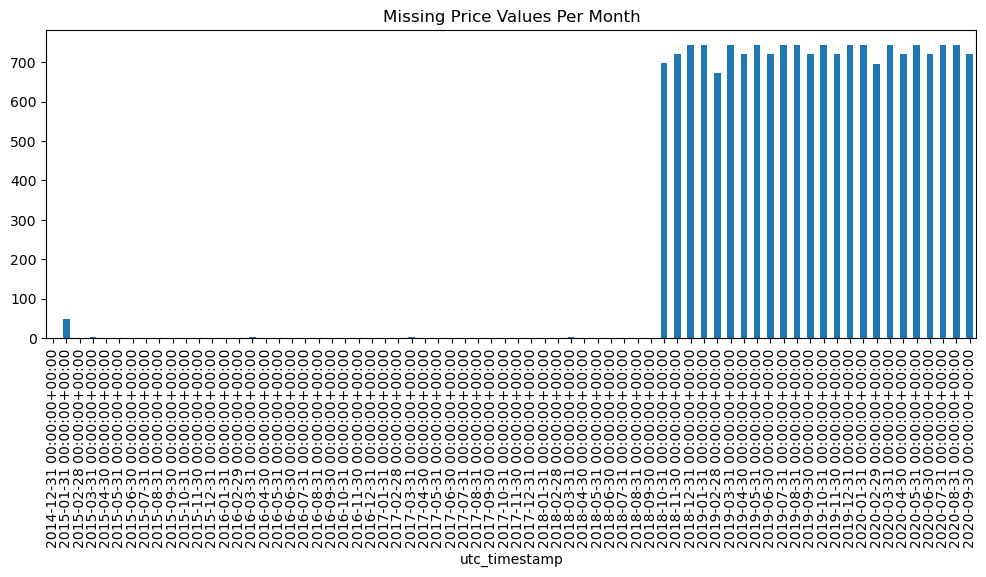

In [32]:
# Check for NaN
nan_counts = austria_df['price'].isnull().resample('M').sum()
nan_counts.plot(kind='bar', figsize=(12, 4), title='Missing Price Values Per Month')

### We will use only data till 30-08-2018

In [33]:
austria_df = austria_df['2015-02-01':'2018-09-30']

In [34]:
# Filling the missing values
austria_df.fillna(method='ffill', inplace=True)
austria_df.fillna(method='bfill', inplace=True)

C:\Users\rande\AppData\Local\Temp\ipykernel_10124\2592704239.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  austria_df.fillna(method='ffill', inplace=True)
C:\Users\rande\AppData\Local\Temp\ipykernel_10124\2592704239.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  austria_df.fillna(method='bfill', inplace=True)


In [35]:
print(austria_df.isnull().sum())

load_actual         0
load_forecast       0
price               0
solar_generation    0
Wind_generation     0
Weekday             0
Hour                0
Month               0
dtype: int64


In [36]:
print(austria_df.describe())

        load_actual  load_forecast         price  solar_generation  \
count  32112.000000   32112.000000  32112.000000      32112.000000   
mean    7077.925324    7125.949053     33.988883        128.355070   
std     1400.310667    1381.806572     14.888293        183.641345   
min      664.000000    3739.000000    -76.000000          0.000000   
25%     5949.750000    6010.000000     25.000000          0.000000   
50%     7052.000000    7117.500000     33.000000         17.000000   
75%     8097.000000    8095.000000     42.000000        219.000000   
max    10788.000000   11608.000000    143.000000        911.000000   

       Wind_generation          Hour  
count     32112.000000  32112.000000  
mean        645.196873     11.500000  
std         602.331625      6.922294  
min           0.000000      0.000000  
25%         150.000000      5.750000  
50%         443.000000     11.500000  
75%        1002.000000     17.250000  
max        2662.000000     23.000000  


In [37]:
austria_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32112 entries, 2015-02-01 00:00:00+00:00 to 2018-09-30 23:00:00+00:00
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   load_actual       32112 non-null  float64
 1   load_forecast     32112 non-null  float64
 2   price             32112 non-null  float64
 3   solar_generation  32112 non-null  float64
 4   Wind_generation   32112 non-null  float64
 5   Weekday           32112 non-null  object 
 6   Hour              32112 non-null  int32  
 7   Month             32112 non-null  object 
dtypes: float64(5), int32(1), object(2)
memory usage: 2.1+ MB


### Creating more features

In [38]:
# Cleaning cloumn names
austria_df.columns = austria_df.columns.str.strip()
austria_df.rename(columns={'AT_load_actual_entsoe_transparency': 'load_actual','AT_load_forecast_entsoe_transparency':'load_forecast','AT_price_day_ahead':'price','AT_solar_generation_actual':'solar_generation','AT_wind_onshore_generation_actual':'Wind_generation'}, inplace=True)

In [39]:
austria_df.head()

,load_actual,load_forecast,price,solar_generation,Wind_generation,Weekday,Hour,Month
utc_timestamp,,,,,,,,
2015-02-01 00:00:00+00:00,6241.0,6186.0,25.0,0.0,131.0,Sunday,0,February
2015-02-01 01:00:00+00:00,6126.0,6111.0,24.0,0.0,119.0,Sunday,1,February
2015-02-01 02:00:00+00:00,5983.0,6019.0,24.0,0.0,89.0,Sunday,2,February
2015-02-01 03:00:00+00:00,5966.0,6027.0,24.0,0.0,56.0,Sunday,3,February
2015-02-01 04:00:00+00:00,6004.0,6247.0,24.0,0.0,56.0,Sunday,4,February


### 1. Price Vs Time

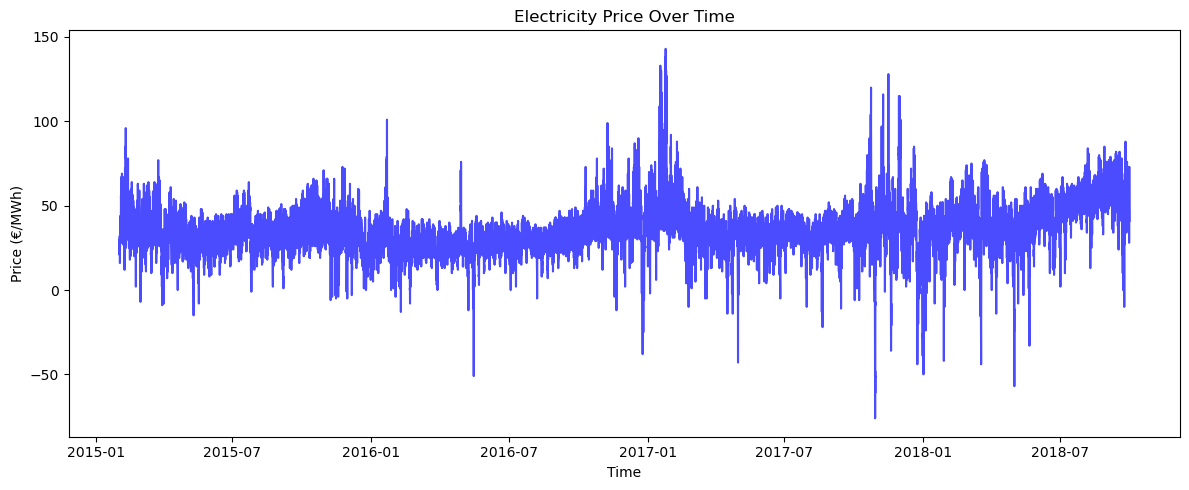

In [40]:
plt.figure(figsize=(12, 5))
plt.plot(austria_df['price'], color='blue', alpha=0.7)
plt.title('Electricity Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price (€/MWh)')
plt.tight_layout()
plt.show()

### 2.Load vs Time

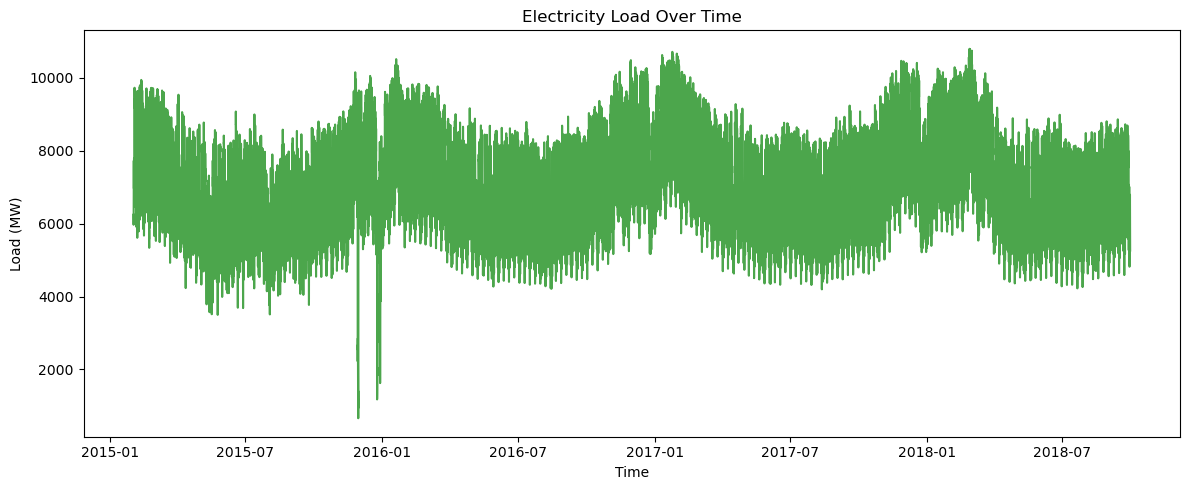

In [41]:
plt.figure(figsize=(12, 5))
plt.plot(austria_df['load_actual'], color='green', alpha=0.7)
plt.title('Electricity Load Over Time')
plt.xlabel('Time')
plt.ylabel('Load (MW)')
plt.tight_layout()
plt.show()

### Hourly, Weekly, Monthly Averages
### 3. Hourly Average Price

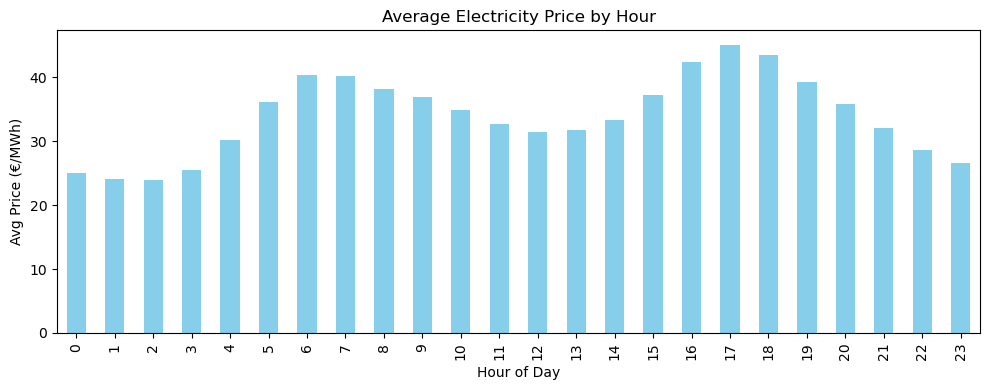

In [42]:
hourly_avg = austria_df.groupby('Hour')['price'].mean()
hourly_avg.plot(kind='bar', figsize=(10, 4), color='skyblue')
plt.title('Average Electricity Price by Hour')
plt.ylabel('Avg Price (€/MWh)')
plt.xlabel('Hour of Day')
plt.tight_layout()
plt.show()

### 4. Day of Week Average Load

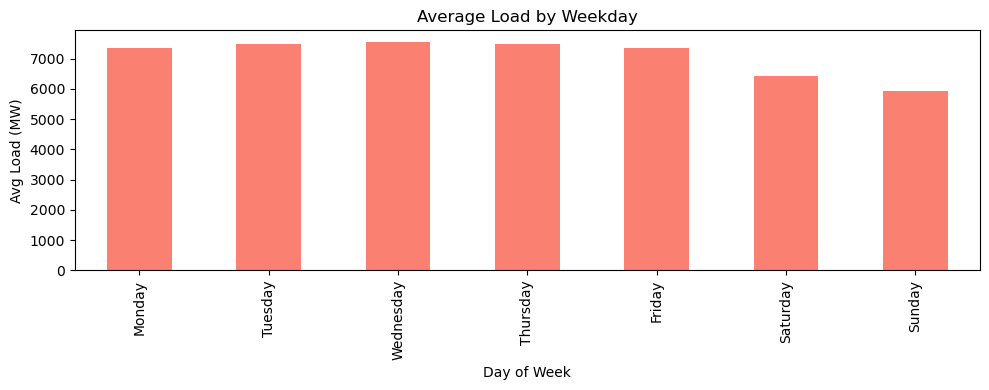

In [43]:
weekday_avg = austria_df.groupby('Weekday')['load_actual'].mean()
weekday_avg = weekday_avg.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

weekday_avg.plot(kind='bar', figsize=(10, 4), color='salmon')
plt.title('Average Load by Weekday')
plt.ylabel('Avg Load (MW)')
plt.xlabel('Day of Week')
plt.tight_layout()
plt.show()

### 5. Heatmap of Avg Price by Hour & Weekday

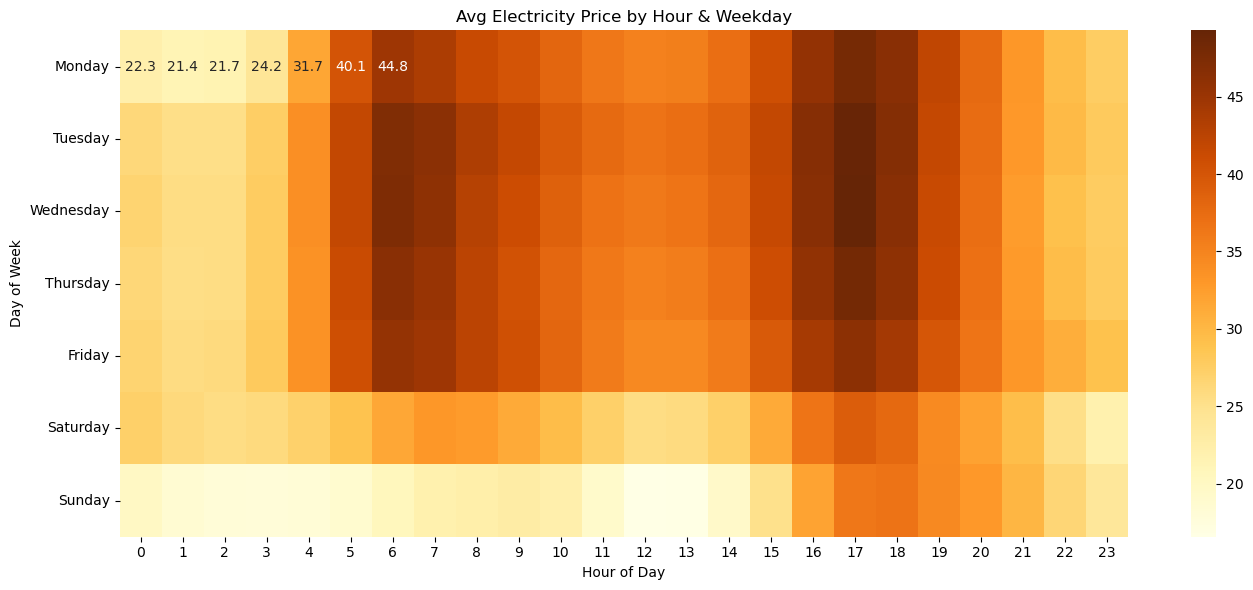

In [44]:
pivot_price = austria_df.pivot_table(index='Weekday', columns='Hour', values='price', aggfunc='mean')
pivot_price = pivot_price.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(14, 6))
sns.heatmap(pivot_price, cmap='YlOrBr', annot=True, fmt=".1f")
plt.title('Avg Electricity Price by Hour & Weekday')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

In [45]:
austria_df.to_csv(r'../data/Processed/time_series_processed_1.csv')